In [406]:
%load_ext autoreload

In [407]:
%autoreload 2

# 目的
本ノートブックでは、線形回帰を行うことを前提とした、探索的データ解析（Exploratory Data Analysis:EDA）の練習を行う。

In [408]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

#invite people for the Kaggle party
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

import missingno as msno

import eda_preprocess as ep

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/Users/yamauchito_satoshi/Documents/data/kaggle/house-prices-advanced-regression-techniques'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

data_dirname = r'/Users/yamauchito_satoshi/Documents/data/kaggle/house-prices-advanced-regression-techniques'

/Users/yamauchito_satoshi/Documents/data/kaggle/house-prices-advanced-regression-techniques/test.csv
/Users/yamauchito_satoshi/Documents/data/kaggle/house-prices-advanced-regression-techniques/data_description.txt
/Users/yamauchito_satoshi/Documents/data/kaggle/house-prices-advanced-regression-techniques/train.csv
/Users/yamauchito_satoshi/Documents/data/kaggle/house-prices-advanced-regression-techniques/sample_submission.csv


In [484]:
def reset_data():
    train = pd.read_csv(os.path.join(data_dirname, "train.csv"))
    test_data = pd.read_csv(os.path.join(data_dirname, "test.csv"))
    return train, test_data

In [485]:
train, test_data = reset_data()
train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [486]:
test_data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


# 目的変数の解析
統計量、ヒストグラムにより目的変数の特徴を確認する。

In [435]:
train["SalePrice"].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

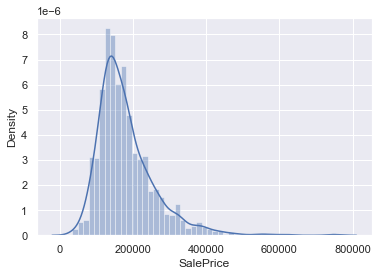

In [318]:
sns.distplot(train["SalePrice"])

In [319]:
print("歪度: %f" % train['SalePrice'].skew())
print("尖度: %f" % train['SalePrice'].kurt())

歪度: 1.882876
尖度: 6.536282


# 説明変数の解析
説明変数と目的変数間の関係を解析する。

## 連続値は散布図

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


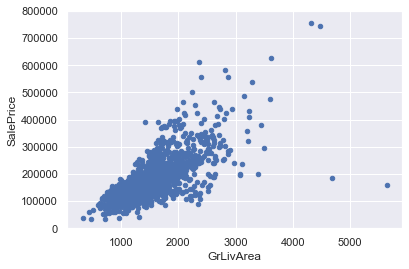

In [320]:
#説明変数と目的変数の散布図作成
var = 'GrLivArea'
data = pd.concat([train['SalePrice'], train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

## 離散値は散布図を箱ヒゲ図に変換したもの

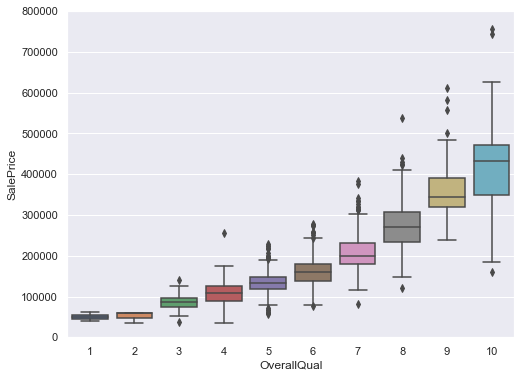

In [321]:
#box plot overallqual/saleprice
var = 'OverallQual'
data = pd.concat([train['SalePrice'], train[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

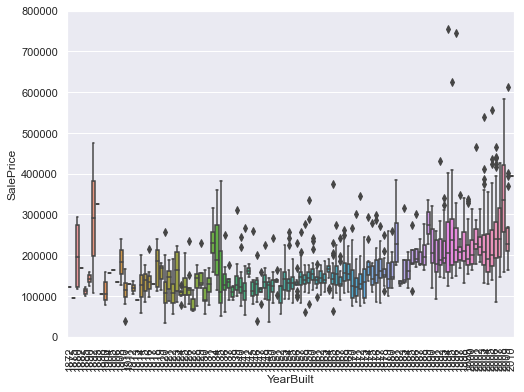

In [322]:
#box plot overallqual/saleprice
var = 'YearBuilt'
data = pd.concat([train['SalePrice'], train[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);

## まとめて見たい場合は相関行列のヒートマップ

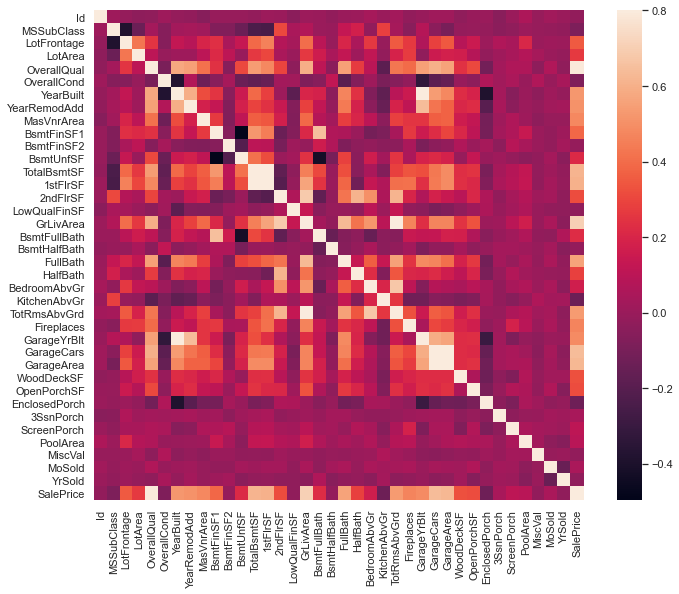

In [323]:
#correlation matrix
corrmat = train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

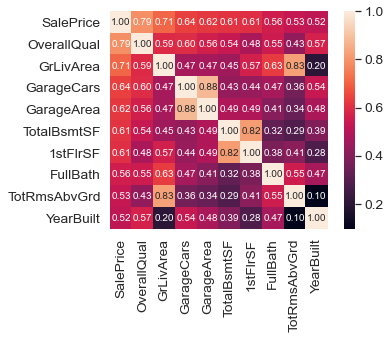

In [324]:
#目的変数と特に相関が強い10個を選択

#saleprice correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

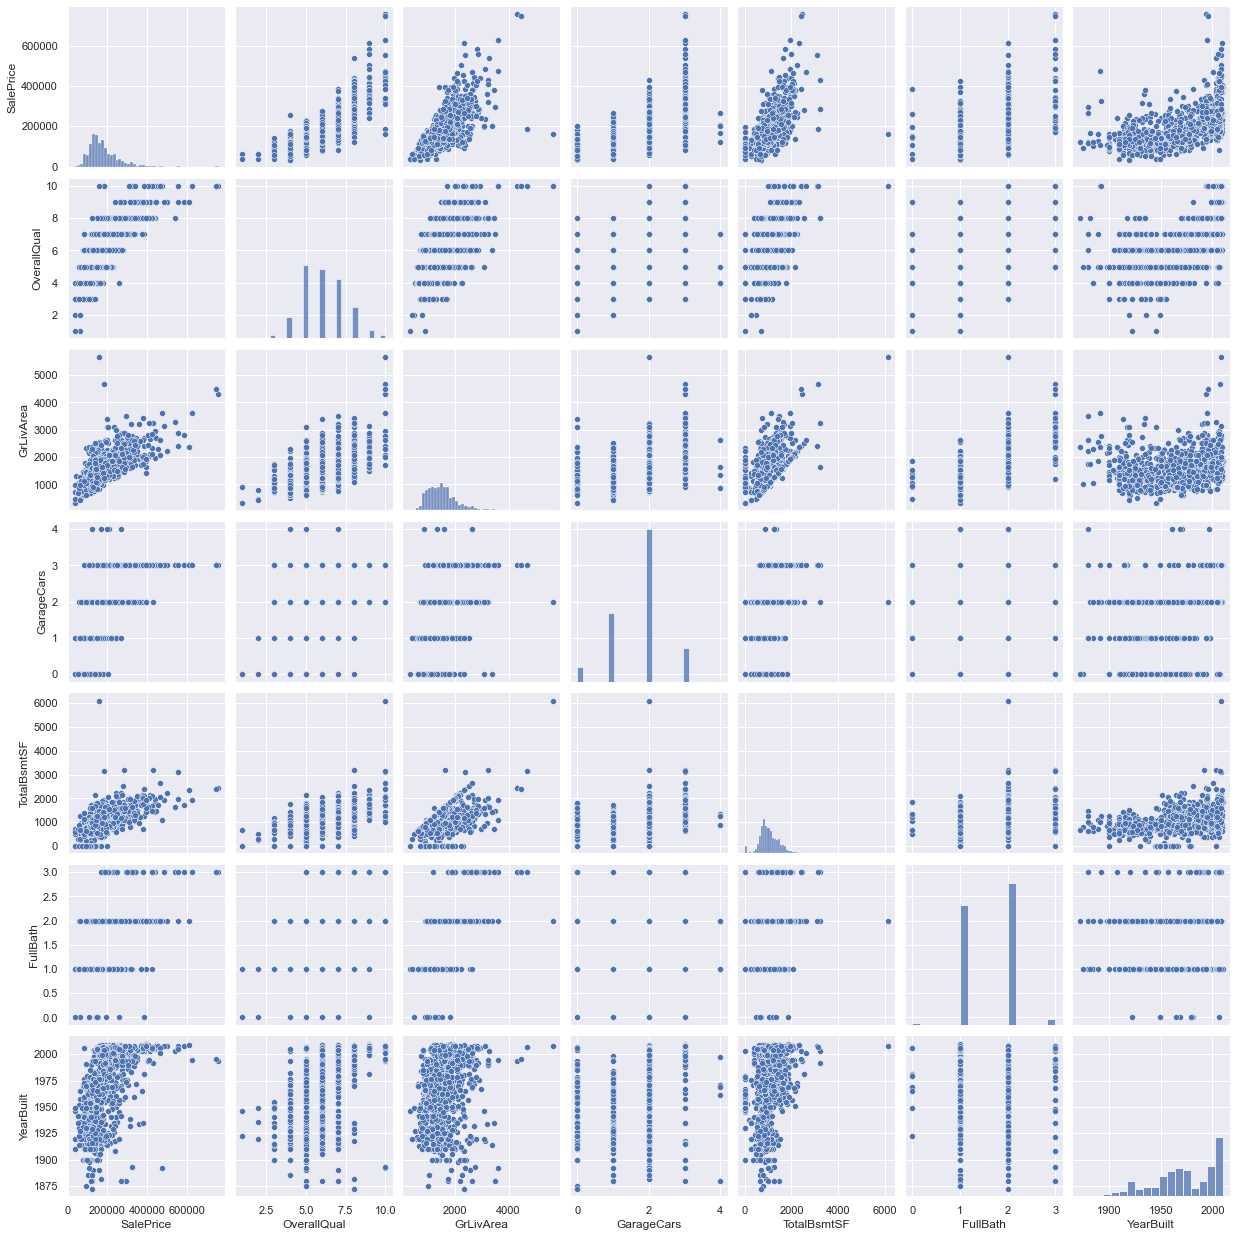

In [325]:
#scatterplot
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(train[cols], size = 2.5)
plt.show();

# 【独自処理】目的変数との相関がある説明変数同士のクラスタリング
説明変数間の相関係数を類似度として階層型クラスタリングを行う。

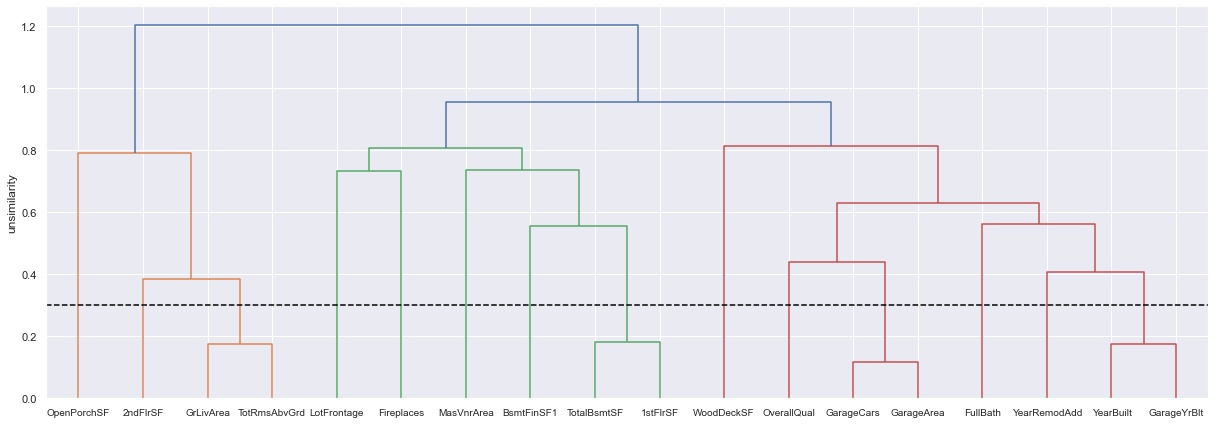

In [459]:
from scipy.cluster.hierarchy import dendrogram
from scipy.spatial.distance import pdist

selected_label, distmat, row_clusters = ep.var_select_by_clustring(corrmat, "SalePrice")

plt.figure(figsize=(17,6))
row_dendr = dendrogram(row_clusters, labels=distmat.index, leaf_font_size=10)
plt.ylabel("unsimilarity")
plt.hlines([0.3],  0, 1000, "black", linestyles='dashed')
plt.tight_layout()
plt.show()

In [460]:
selected_label = ep.highcorr_compare(selected_label, distmat, corrmat, "SalePrice")
selected_label

['LotFrontage',
 'OverallQual',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'TotalBsmtSF',
 '1stFlrSF',
 'GrLivArea',
 'FullBath',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF']

# 欠損値に対する処理
- 15%以上が欠損値の場合は、その変数は削除してないものと扱う。この時は、何らかの処理でその欠損値を埋めるべきではない。

In [553]:
train, test_data = reset_data()

In [554]:
#missing data
missing_data_train = ep.missing_data_analysis(train)
missing_data_train.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
GarageCond,81,0.055479
GarageType,81,0.055479
GarageFinish,81,0.055479


In [555]:
ep.missing_data_analysis(test_data).head(20)

,Total,Percent
PoolQC,1456,0.997944
MiscFeature,1408,0.965045
Alley,1352,0.926662
Fence,1169,0.801234
FireplaceQu,730,0.500343
LotFrontage,227,0.155586
GarageYrBlt,78,0.053461
GarageQual,78,0.053461
GarageFinish,78,0.053461
GarageCond,78,0.053461


<AxesSubplot:>

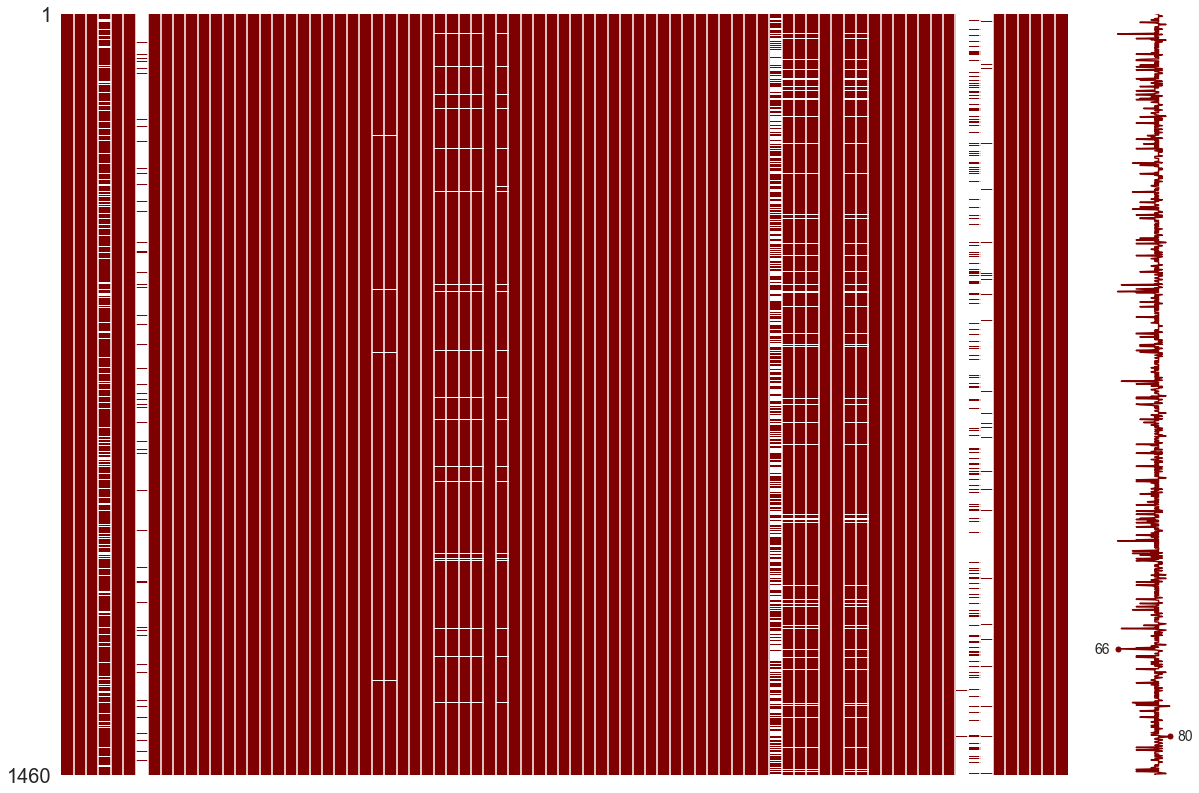

In [556]:
#以下のように欠損値のあるデータをマトリックス形式で可視化も可能。
msno.matrix(df=train, figsize=(20,14), color=(0.5,0,0))

In [557]:
#dealing with missing data

train = train.drop((missing_data_train[missing_data_train['Total'] > 1]).index,1)
train = train.drop(train.loc[train['Electrical'].isnull()].index)
train.isnull().sum().max() #just checking that there's no missing data missing...

0

In [558]:
#dealing with missing data

test_data = test_data.drop((missing_data_train[missing_data_train['Total'] > 1]).index,1)
test_data = test_data.drop(test_data.loc[test_data['Electrical'].isnull()].index)


missing_data_test = ep.missing_data_analysis(test_data)
test_data=test_data.fillna(test_data.mean())
test_data = test_data.fillna(method="ffill")

test_data.isnull().sum().max() #just checking that there's no missing data missing...

0

# 外れ値処理

In [417]:
#standardizing data
saleprice_scaled = StandardScaler().fit_transform(train['SalePrice'][:,np.newaxis]);
low_range = saleprice_scaled[saleprice_scaled[:,0].argsort()][:10]
high_range= saleprice_scaled[saleprice_scaled[:,0].argsort()][-10:]
print('outer range (low) of the distribution:')
print(low_range)
print('\nouter range (high) of the distribution:')
print(high_range)

outer range (low) of the distribution:
[[-1.83820775]
 [-1.83303414]
 [-1.80044422]
 [-1.78282123]
 [-1.77400974]
 [-1.62295562]
 [-1.6166617 ]
 [-1.58519209]
 [-1.58519209]
 [-1.57269236]]

outer range (high) of the distribution:
[[3.82758058]
 [4.0395221 ]
 [4.49473628]
 [4.70872962]
 [4.728631  ]
 [5.06034585]
 [5.42191907]
 [5.58987866]
 [7.10041987]
 [7.22629831]]


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


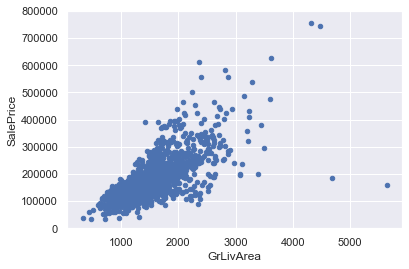

In [418]:
#bivariate analysis saleprice/grlivarea
var = 'GrLivArea'
data = pd.concat([train['SalePrice'], train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

In [419]:
#deleting points
train.sort_values(by = 'GrLivArea', ascending = False)[:2]
train = train.drop(train[train['Id'] == 1299].index)
train = train.drop(train[train['Id'] == 524].index)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


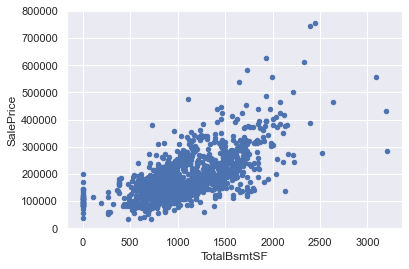

In [420]:
#bivariate analysis saleprice/grlivarea
var = 'TotalBsmtSF'
data = pd.concat([train['SalePrice'], train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

# 中核の解析
- 正規性の解析

## 正規性の解析
歪度が正の値をとり、正規確率プロットが直線とならないため、正規分布ではない。たたし、今回のように右に裾が長い分布の場合は、対数変換が有効な可能性がある。


なぜ正規分布に従わせる必要がある？

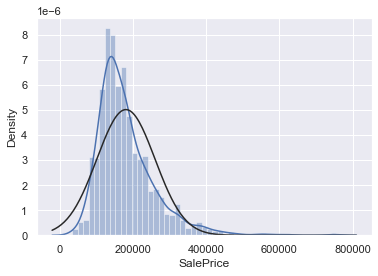

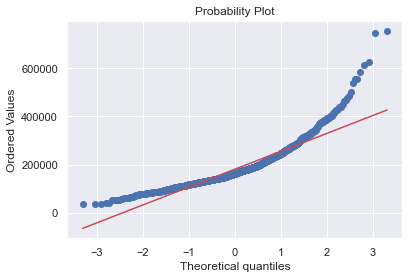

In [421]:
#histogram and normal probability plot
sns.distplot(train['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)

In [559]:
#applying log transformation
train['SalePrice'] = np.log(train['SalePrice'])

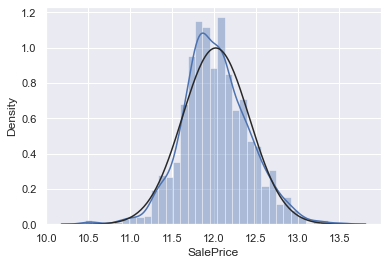

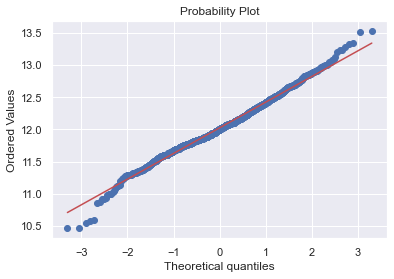

In [423]:
#transformed histogram and normal probability plot
sns.distplot(train['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)

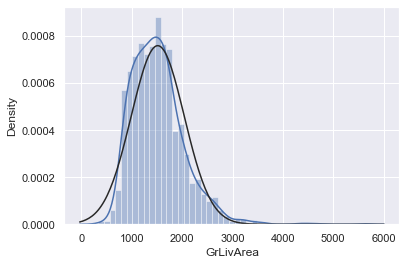

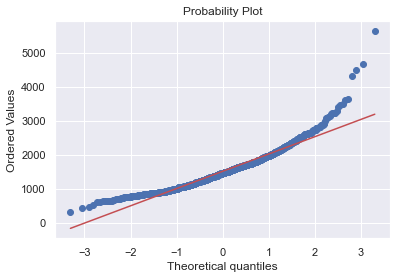

In [509]:
#histogram and normal probability plot
sns.distplot(train['GrLivArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(train['GrLivArea'], plot=plt)

In [560]:
#data transformation
train['GrLivArea'] = np.log(train['GrLivArea'])
test_data['GrLivArea'] = np.log(test_data['GrLivArea'])

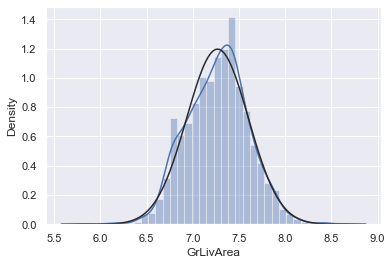

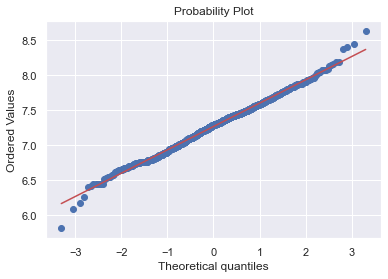

In [511]:
#transformed histogram and normal probability plot
sns.distplot(train['GrLivArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(train['GrLivArea'], plot=plt)

以下のように、観測値が0のために対数を取れない場合は、値を持つかどうかの２値変数を新たに説明変数に追加する。そして、対数を取れるデータのみについて対数変換を行う。

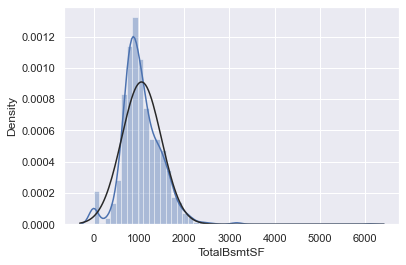

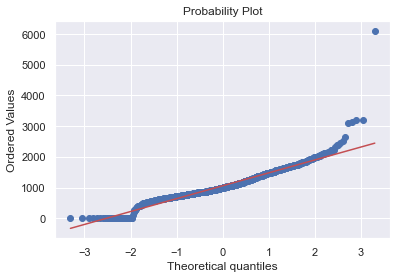

In [512]:
#histogram and normal probability plot
sns.distplot(train['TotalBsmtSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(train['TotalBsmtSF'], plot=plt)

In [561]:
#create column for new variable (one is enough because it's a binary categorical feature)
#if area>0 it gets 1, for area==0 it gets 0
train['HasBsmt'] = pd.Series(len(train['TotalBsmtSF']), index=train.index)
train['HasBsmt'] = 0 
train.loc[train['TotalBsmtSF']>0,'HasBsmt'] = 1

test_data['HasBsmt'] = pd.Series(len(test_data['TotalBsmtSF']), index=test_data.index)
test_data['HasBsmt'] = 0 
test_data.loc[test_data['TotalBsmtSF']>0,'HasBsmt'] = 1

In [562]:
#transform data
train.loc[train['HasBsmt']==1,'TotalBsmtSF'] = np.log(train['TotalBsmtSF'])
test_data.loc[test_data['HasBsmt']==1,'TotalBsmtSF'] = np.log(test_data['TotalBsmtSF'])

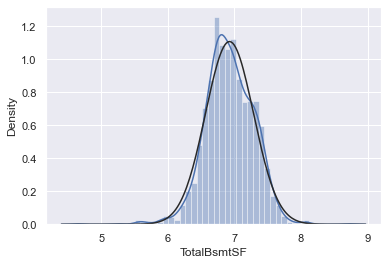

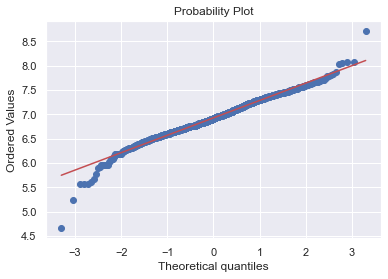

In [518]:
#histogram and normal probability plot
sns.distplot(train[train['TotalBsmtSF']>0]['TotalBsmtSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(train[train['TotalBsmtSF']>0]['TotalBsmtSF'], plot=plt)

## 等分散性の確認
正規性が満たされるように上でデータ変換を行うことで、以下のように等分散性の課題を解決できる。

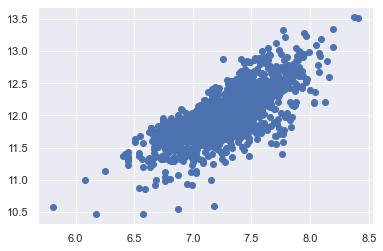

In [279]:
#scatter plot
plt.scatter(train['GrLivArea'], train['SalePrice']);

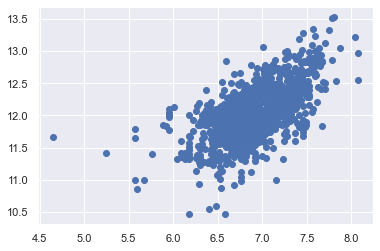

In [280]:
#scatter plot
plt.scatter(train[train['TotalBsmtSF']>0]['TotalBsmtSF'], train[train['TotalBsmtSF']>0]['SalePrice']);

In [565]:
X_train = train.drop(["SalePrice"], axis=1)
y_train = train["SalePrice"]


X_test = test_data
y_test = np.log(pd.read_csv(os.path.join(data_dirname, "sample_submission.csv"))["SalePrice"])

In [570]:
train_size = X_train.shape[0]
test_size = X_test.shape[0]

In [580]:
X_total = pd.concat([X_train, X_test], axis=0)
X_total = pd.get_dummies(X_total)

In [581]:
X_train = X_total[:train_size]
X_test = X_total[train_size:train_size+test_size]

# 線形モデルの作成
以下のモデルで線形回帰を行う。
- 正則化なしの線形回帰
- リッジ回帰
- Lasso回帰

In [591]:
def lin_regplot(X, y, model):
    plt.scatter(y, model.predict(X), c="steelblue", edgecolors="white", s=70)
    plt.plot(y, y, color="black", lw=2)
    plt.xlabel("y_true")
    plt.ylabel("y_predict")

## 正則化なしの線形回帰

Text(0.5, 1.0, 'predict of train data')

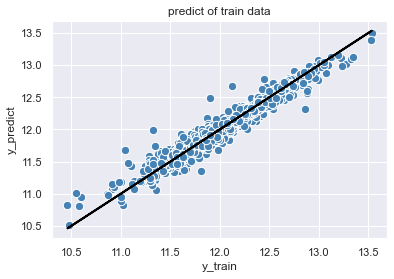

In [588]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR

slr = LinearRegression()
slr.fit(X_train, y_train)
y_pred_train = slr.predict(X_train)

lin_regplot(X_train, y_train, slr)
plt.title("predict of target value")

Text(0.5, 1.0, 'predict of train data')

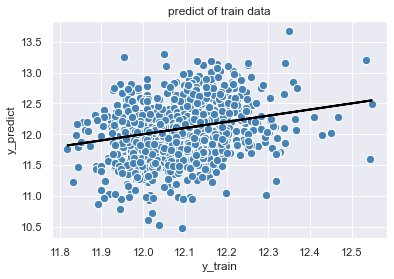

In [589]:
lin_regplot(X_test, y_test, slr)
plt.title("predict of train data")

## リッジ回帰

Text(0.5, 1.0, 'predict of train data')

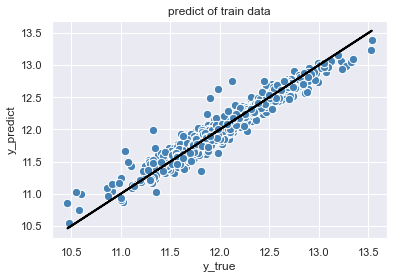

In [593]:
slr = Ridge(alpha=1)
slr.fit(X_train, y_train)
y_pred_train = slr.predict(X_train)

lin_regplot(X_train, y_train, slr)
plt.title("predict of train data")

Text(0.5, 1.0, 'predict of train data')

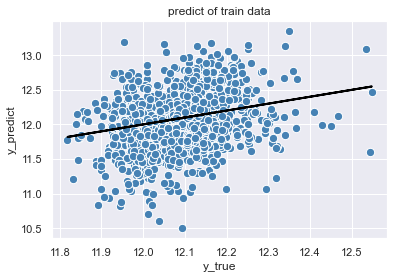

In [594]:
lin_regplot(X_test, y_test, slr)
plt.title("predict of train data")

## Lasso回帰

Text(0.5, 1.0, 'predict of train data')

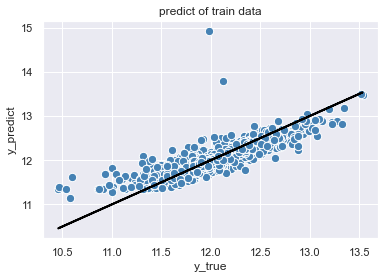

In [595]:
slr = Lasso(alpha=1)
slr.fit(X_train, y_train)
y_pred_train = slr.predict(X_train)

lin_regplot(X_train, y_train, slr)
plt.title("predict of train data")

Text(0.5, 1.0, 'predict of train data')

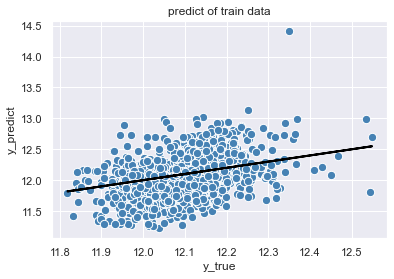

In [596]:
lin_regplot(X_test, y_test, slr)
plt.title("predict of train data")

# 非線形モデルの作成
- SV回帰
- ランダムフォレスト回帰
- ニューラルネットワーク